## Análisis Exploratorio

In [2]:
import pandas as pd
df = pd.read_csv("../data/raw/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.shape

(1143, 13)

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


# Tratamiento de la variable dependiente

In [5]:
df["quality"].value_counts(normalize=True) * 100

quality
5    42.257218
6    40.419948
7    12.510936
4     2.887139
8     1.399825
3     0.524934
Name: proportion, dtype: float64

## Se observa que hay un desbalanceo de la variable quality, donde las clases 5 y 6 concentran el 82%, mientras que las 3,4 y 8 representan menos del 5%.

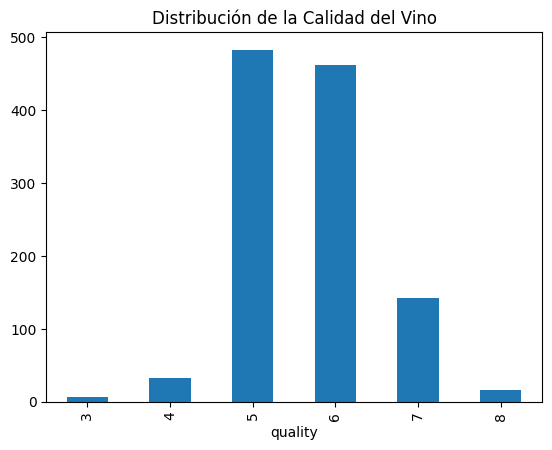

In [7]:
import matplotlib.pyplot as plt

df["quality"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribución de la Calidad del Vino")
plt.show()


## Para evitar problemas de sesgo y sobreajuste se opta por transformar la variable quality en binaria.
 # - Calidad Alta(1): 6,7,8
 # - Calidad Baja(0): 3,4,5 

In [ ]:
## Clasificación de la variable quality en binaria( alta y baja)

In [8]:
df["quality_label"] = df["quality"].apply(lambda x: 1 if x >= 6 else 0)

In [9]:
df["quality_label"].value_counts()

quality_label
1    621
0    522
Name: count, dtype: int64

In [10]:
df["quality_label"].value_counts(normalize=True) * 100

quality_label
1    54.330709
0    45.669291
Name: proportion, dtype: float64

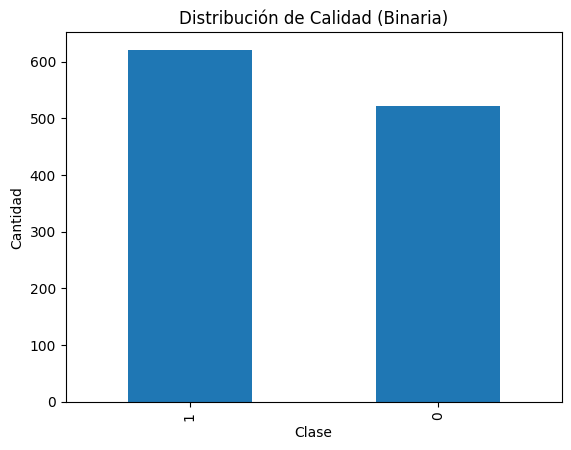

In [11]:
import matplotlib.pyplot as plt

df["quality_label"].value_counts().plot(kind="bar")
plt.title("Distribución de Calidad (Binaria)")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

# Despues de la clasificación de la variable objetivo quality, se observa que presenta una distribución relativamente balanceada.

## Análisis de las variable independientes y correlación 

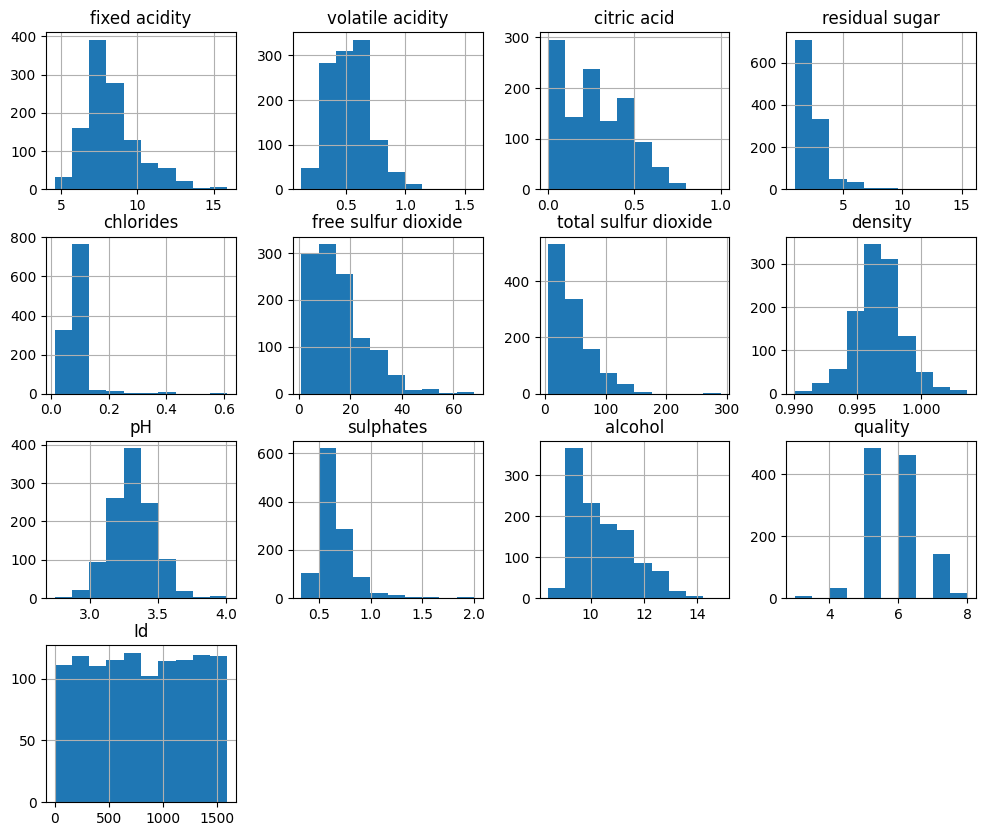

In [ ]:
df.hist(figsize=(12,10))
plt.show()



# Se observa que las variables fixed acidity, ph y density tiene una distribución relativamente simétrica por lo que podrian aportar en el modelo, mientras que las variables restantes presentan una asímetria positiva por lo que podrías afectar el modelo. No se aplica la estandarizacion debido a que el modelo de Random Forest no es sensible a la escala de variables.

In [13]:
df.corr()["quality_label"].sort_values(ascending=False)


quality_label           1.000000
quality                 0.846007
alcohol                 0.440397
sulphates               0.234221
citric acid             0.155144
Id                      0.100192
fixed acidity           0.088682
pH                      0.015251
residual sugar         -0.007732
free sulfur dioxide    -0.070577
chlorides              -0.100601
density                -0.154255
total sulfur dioxide   -0.226680
volatile acidity       -0.330787
Name: quality_label, dtype: float64

In [12]:
X = df.drop(["quality", "quality_label"], axis=1)
y = df["quality_label"]

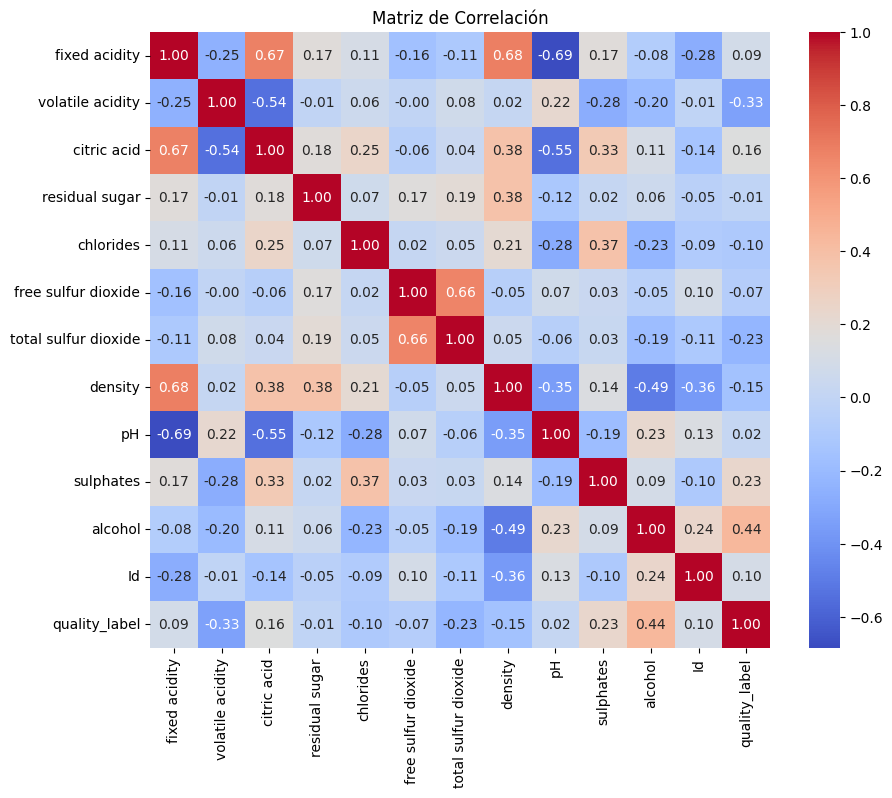

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.drop("quality", axis=1).corr(), 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Se observa que la variable alcohol, sulphates presenta mayor correlación positiva con la calidad del vino, mientras que acidez volatil y total sulfur dioxide presentan correlaciones negativas moderadas. No se identificaron correlaciones altas entre variable independientes, por lo que no se evidencia multicolinealidad significatica.

# Conclusion del análisis exploratrio
* Las variables alcohol y sulphates presentan mayor correlación positiva con la calidad.

* Las variables volatile acidity y total sulfur dioxide presentan correlación negativa moderada.

* No se identificó multicolinealidad significativa.

* No se detectaron valores nulos en el dataset.

* No se aplicó estandarización debido a que el modelo inicial (Random Forest) no es sensible a la escala.


In [16]:
df.to_csv("../data/training/wine_training.csv", index=False)